In [40]:
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt

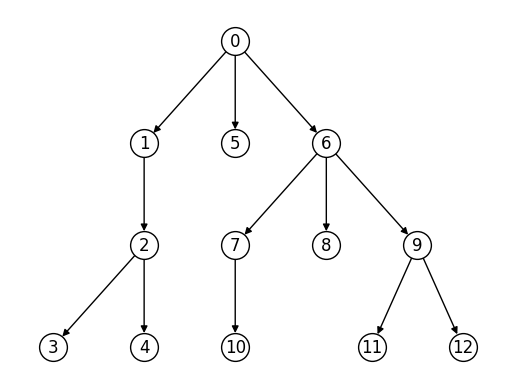

In [2]:
G = nx.DiGraph()

G.add_node(0)

arr_edges = [[0, 1], [1,  2], [0,  5], [0,  6], [2, 3], [2, 4], [6, 7], [7, 10], [6, 8],
             [6, 9], [9, 11], [9, 12]]

for edge in arr_edges:
  G.add_nodes_from(edge)
  G.add_edge(*edge)

fig, ax = plt.subplots()

pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot',
  args="-Grankdir=TB")
nx.draw(G, ax=ax, with_labels=True, node_size=400, node_color="w", edgecolors="k",
        pos=pos)

In [3]:
leaf_nodes = [node for node in G.nodes() if G.out_degree(node) == 0]
leaf_nodes

[5, 3, 4, 10, 8, 11, 12]

Huffman encoding

In [70]:
# -- initial forest
labels = ["A", "B", "C", "D", "E", "F"]
weights = [0.08, 0.10, 0.12, 0.15, 0.20, 0.35]

for step in range(5):
  print(f"step = {step + 1}")
  unsort_weights = [sum(weights[:2])] + weights[2:]
  unsort_labels = ["("+" ".join(labels[:2])+")"] + labels[2:]
  # print(unsort_weights)
  # print(unsort_labels)
  idx_sort = np.argsort(unsort_weights)
  weights = [unsort_weights[idx] for idx in idx_sort]
  labels =[unsort_labels[idx] for idx in idx_sort]
  print(weights)
  print(labels)


step = 1
[0.12, 0.15, 0.18, 0.2, 0.35]
['C', 'D', '(A B)', 'E', 'F']
step = 2
[0.18, 0.2, 0.27, 0.35]
['(A B)', 'E', '(C D)', 'F']
step = 3
[0.27, 0.35, 0.38]
['(C D)', 'F', '((A B) E)']
step = 4
[0.38, 0.62]
['((A B) E)', '((C D) F)']
step = 5
[1.0]
['(((A B) E) ((C D) F))']


[0.18, 0.12, 0.15, 0.2, 0.35]
['A B', 'C', 'D', 'E', 'F']
[0.12, 0.15, 0.18, 0.2, 0.35]
['C', 'D', 'A B', 'E', 'F']


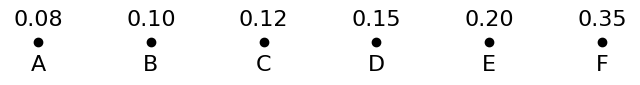

In [ ]:
fig, ax = plt.subplots(figsize=(8, 2))

y_offset = 0.2
i = 0
labels = ["A", "B", "C", "D", "E", "F"]
weights = [0.08, 0.10, 0.12, 0.15, 0.20, 0.35]
num_of_points = len(labels)
x_data = np.arange(num_of_points)
y_data = np.ones(num_of_points)*i
ax.scatter(x_data, y_data, color="k")
for idx in range(num_of_points):
  ax.text(x_data[idx], y_data[idx]-y_offset, s=labels[idx], va="center", ha="center")
  ax.text(x_data[idx], y_data[idx]+y_offset, s=f"{weights[idx]:.2f}", va="center", ha="center")

i = 1

num_of_points = len
unsort_weights = [sum(weights[:2])] + weights[2:]
unsort_labels = [" ".join(labels[:2])] + labels[2:]
print(unsort_weights)
print(unsort_labels)
idx_sort = np.argsort(unsort_weights)
weights = [unsort_weights[idx] for idx in idx_sort]
labels =[unsort_labels[idx] for idx in idx_sort]
print(weights)
print(labels)
ax.axis("off")
ax.set_aspect("equal")

plt.show(fig)